### Importing Dependencies


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import tensorflow as tf
import keras
from keras.utils import to_categorical

### Importing the MNIST data

In [58]:
mnist = tf.keras.datasets.mnist
(x_train, y_train) , (x_test , y_test) = mnist.load_data()
len(x_train) , len(x_test)

(60000, 10000)

### Defining a funtion to display the image in Binary form

In [59]:
def display(img):
  plt.imshow(img , cmap = plt.cm.binary)


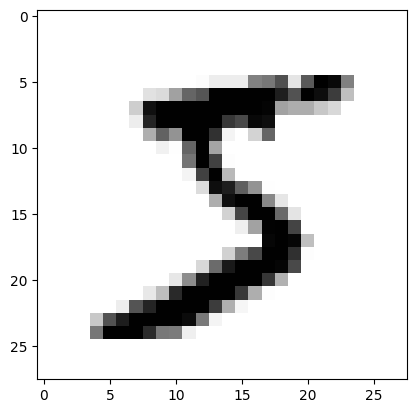

In [60]:
display(x_train[0])

### Image preprocessing

#### Image Normalization

In [61]:
x_train = tf.keras.utils.normalize(x_train , axis = 1)
x_test = tf.keras.utils.normalize(x_test , axis = 1)

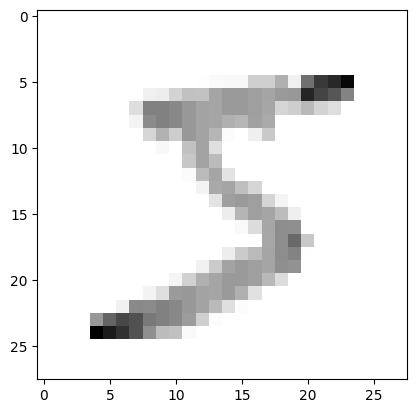

In [62]:
display(x_train[0])

#### Resizing the Images to make them suitable for CNN

In [37]:
img_dim = 28
x_train = np.array(x_train).reshape(-1 , img_dim, img_dim, 1) #increasing one dim for kernel operation
x_test = np.array(x_test).reshape(-1 , img_dim, img_dim, 1)
print("training sample dimensions : {}".format(x_train.shape))
print("testing sample dimensions : {}".format(x_test.shape))

training sample dimensions : (60000, 28, 28, 1)
testing sample dimensions : (10000, 28, 28, 1)


In [68]:
# One-hot encode the labels
y_trainr = to_categorical(y_train, 10)
y_testr = to_categorical(y_test, 10)


In [69]:
y_train.shape
y_trainr.shape

(60000, 10)

### Creating the Model

In [70]:
#importing necessary dependencies
from keras.models import Sequential
from keras import layers

In [71]:
model = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128,activation = 'relu'),
        layers.Dense(64,activation = 'relu'),
        layers.Dropout(0.2),
        layers.Dense(10, activation="softmax"),
    ]
)

In [72]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
#compiling the model
model.compile(optimizer='adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

### Train the model


In [74]:
history = model.fit(x_train,y_trainr,validation_data = (x_test,y_testr), epochs = 10,batch_size=200,verbose = 2)

Epoch 1/10
300/300 - 10s - 34ms/step - accuracy: 0.8902 - loss: 0.3686 - val_accuracy: 0.9704 - val_loss: 0.0914
Epoch 2/10
300/300 - 9s - 31ms/step - accuracy: 0.9685 - loss: 0.1050 - val_accuracy: 0.9791 - val_loss: 0.0658
Epoch 3/10
300/300 - 10s - 34ms/step - accuracy: 0.9774 - loss: 0.0734 - val_accuracy: 0.9823 - val_loss: 0.0516
Epoch 4/10
300/300 - 10s - 33ms/step - accuracy: 0.9836 - loss: 0.0539 - val_accuracy: 0.9875 - val_loss: 0.0383
Epoch 5/10
300/300 - 10s - 33ms/step - accuracy: 0.9864 - loss: 0.0440 - val_accuracy: 0.9872 - val_loss: 0.0395
Epoch 6/10
300/300 - 15s - 50ms/step - accuracy: 0.9891 - loss: 0.0358 - val_accuracy: 0.9884 - val_loss: 0.0374
Epoch 7/10
300/300 - 13s - 44ms/step - accuracy: 0.9904 - loss: 0.0305 - val_accuracy: 0.9895 - val_loss: 0.0347
Epoch 8/10
300/300 - 12s - 39ms/step - accuracy: 0.9915 - loss: 0.0265 - val_accuracy: 0.9873 - val_loss: 0.0391
Epoch 9/10
300/300 - 11s - 36ms/step - accuracy: 0.9928 - loss: 0.0223 - val_accuracy: 0.9891 - v

### Understanding the model

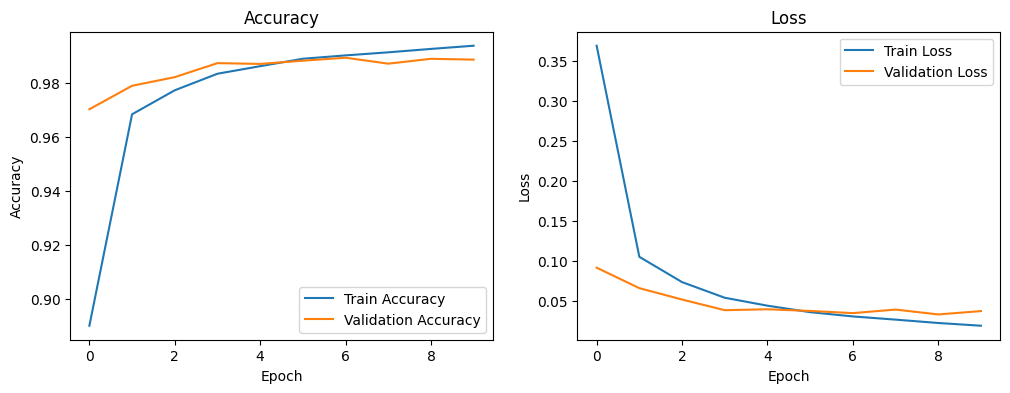

In [75]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [91]:
predictions = model.predict(x_test) #predicting the output values
def predict(n):
    final_predict = []
    for i in range(n):
        final_predict.append(np.argmax(predictions[i]))
    return final_predict
        

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


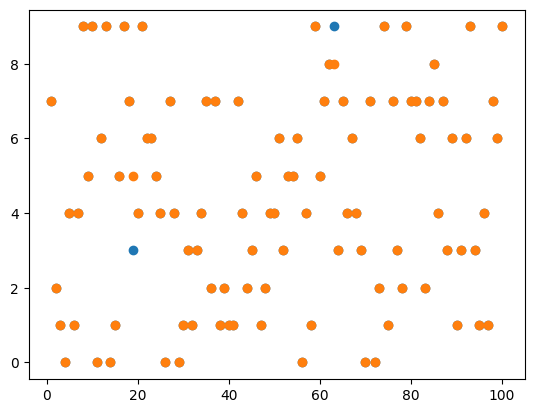

In [94]:
predictions = model.predict(x_test) #predicting the output values
plt.scatter(x = np.arange(1,101), y = y_test[0:100])
plt.scatter(x = np.arange(1,101), y = predict(100))



We can see from the above plot, that out of 100, 98 of the points coincide, leaving 2 points of inaccuracy.

This fits well with the fact that our model achieved an accuracy of 98% on the validation data